In [3]:
import numpy as np

x = np.array([1,2,3])
# print(x)
# print(np.diag(x)) 

M = np.random.normal(0,1,(2,3))
N = np.random.normal(0,1,(3,4))
print(np.matmul(M,N).round(3))
print((M@N).round(3))

[[ 0.653  1.698  1.51   1.126]
 [ 0.978 -0.246 -1.892  1.15 ]]
[[ 0.653  1.698  1.51   1.126]
 [ 0.978 -0.246 -1.892  1.15 ]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn')

#set params

N,n_feature=300,5
lr = 0.03
epochs = 30
b_size = 32
t_W = np.random.uniform(-1,1,(n_feature,1))
t_b = np.random.uniform(-1,1,(1,1))

W = np.random.uniform(-1,1,(n_feature,1))
b = np.random.uniform(-1,1,(1,1))

n_batch = N//b_size

#generate dataset
x_data = np.random.randn(N,n_feature)
y_data = x_data @ t_W + t_b

J_track = list()
W_track,b_track = list(),list()
for epoch in range(epochs):
    for b_idx in range(n_batch):

      W_track.append(W)
      b_track.append(b)
      #get minibatch
      X = x_data[b_idx*b_size: (b_idx+1)*b_size,...]
      Y = y_data[b_idx*b_size: (b_idx+1)*b_size,...]
      
      #forward propagation
      pred = X@W +b
      J0 = (Y-pred)**2
      J = np.mean(J0)
      J_track.append(J)
      
      #jacobians
      dJ_dJ0 = 1/b_size*np.ones((1,b_size))
      dJ0_dpred = np.diag(-2*(Y-pred).flatten())
      dpred_dW = X
      dpred_dB = np.ones((b_size,1))
      
      #backpropagation
      dJ_dpred = dJ_dJ0 @ dJ0_dpred
      dJ_dw = dJ_dpred @ dpred_dW
      dJ_db = dJ_dpred @ dpred_dB

      #parameter update
      W = W-lr*dJ_dw.T
      b = b-lr*dJ_db
      
W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)


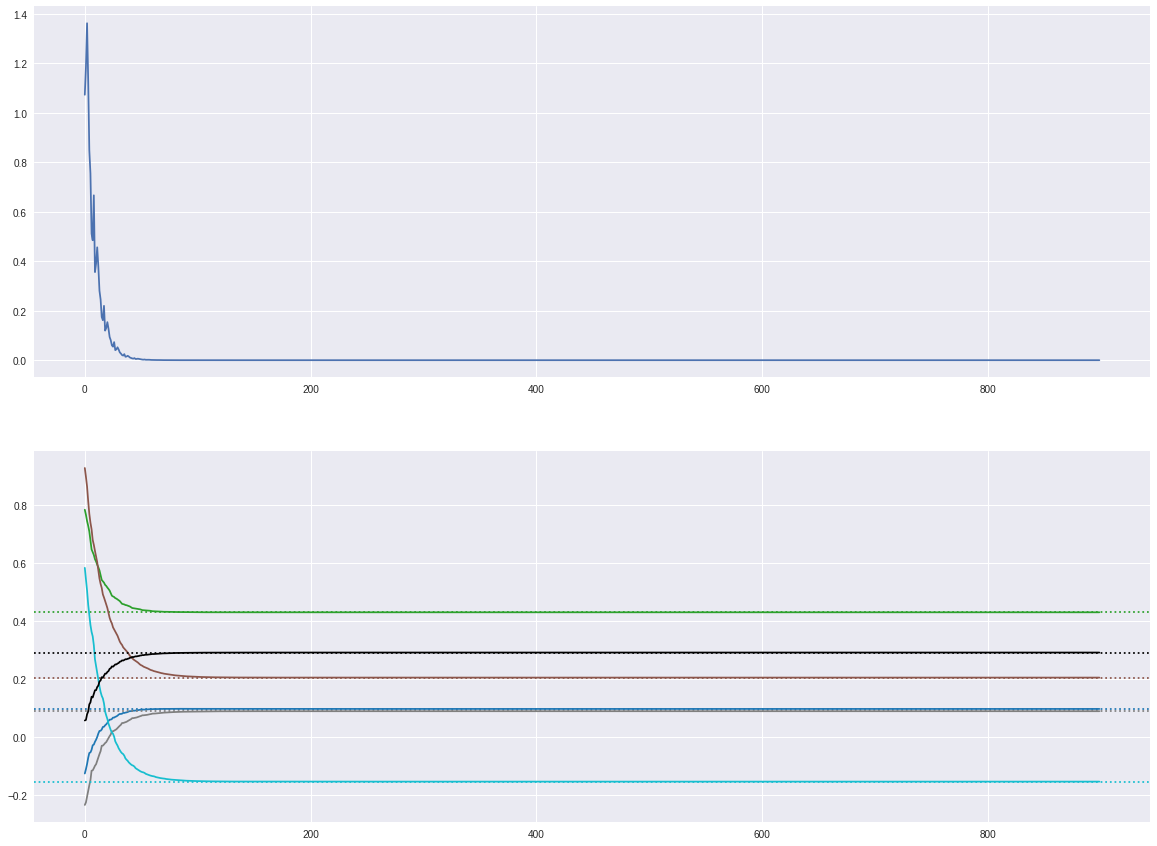

In [30]:
cmap = cm.get_cmap('tab10',n_feature)
fig,axes = plt.subplots(2,1,figsize=(20,15))
axes[0].plot(J_track)

for w_idx,(t_w,w_track) in enumerate(zip(t_W,W_track)):
    axes[1].axhline(y=t_w,linestyle=':',color=cmap(w_idx))
    axes[1].plot(w_track,color=cmap(w_idx))

axes[1].axhline(y=t_b,linestyle=':',color='black')
axes[1].plot(b_track,color='black')